# Deep Learning Wine Quality Predictor

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [1]:
# Initial imports
from path import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Read in data
data = Path("../Resources/winequality.csv")
df = pd.read_csv(data, delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
df[df["quality"]==8].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0
mean,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444,8.0
std,2.119656,0.144914,0.199526,1.295038,0.011678,11.155613,25.433240,0.002378,0.200640,0.115379,1.224011,0.0
min,5.000000,0.260000,0.030000,1.400000,0.044000,3.000000,12.000000,0.990800,2.880000,0.630000,9.800000,8.0
25%,7.250000,0.335000,0.302500,1.800000,0.062000,6.000000,16.000000,0.994175,3.162500,0.690000,11.325000,8.0
50%,8.250000,0.370000,0.420000,2.100000,0.070500,7.500000,21.500000,0.994940,3.230000,0.740000,12.150000,8.0
75%,10.225000,0.472500,0.530000,2.600000,0.075500,16.500000,43.000000,0.997200,3.350000,0.820000,12.875000,8.0
max,12.600000,0.850000,0.720000,6.400000,0.086000,42.000000,88.000000,0.998800,3.720000,1.100000,14.000000,8.0


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
X = df.iloc[:, 0:11].values
y = df["quality"].values

In [18]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [19]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11


nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [20]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Train on 1119 samples, validate on 480 samples
Epoch 1/200
1119/1119 [==============================] - 1s 942us/sample - loss: 26.3436 - mse: 26.3436 - val_loss: 26.0644 - val_mse: 26.0644
Epoch 2/200
1119/1119 [==============================] - 0s 130us/sample - loss: 23.2531 - mse: 23.2531 - val_loss: 23.0067 - val_mse: 23.0067
Epoch 3/200
1119/1119 [==============================] - 0s 156us/sample - loss: 20.3586 - mse: 20.3586 - val_loss: 20.1163 - val_mse: 20.1163
Epoch 4/200
1119/1119 [==============================] - 0s 212us/sample - loss: 17.6292 - mse: 17.6292 - val_loss: 17.3285 - val_mse: 17.3285
Epoch 5/200
1119/1119 [==============================] - 1s 472us/sample - loss: 15.1172 - mse: 15.1172 - val_loss: 14.7217 - val_mse: 14.7217
Epoch 6/200
1119/1119 [==============================] - 0s 338us/sample - loss: 12.8305 - mse: 12.8305 - val_loss: 12.2963 - val_mse: 12.2963
Epoch 7/200
1119/1119 [==============================] - 0s 220us/sample - loss: 10.8084 - mse:

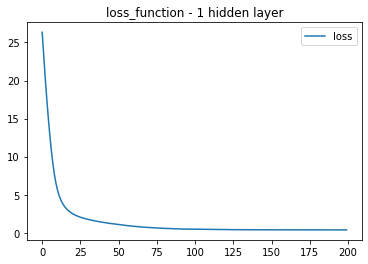

In [21]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [22]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [23]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Train on 1119 samples, validate on 480 samples
Epoch 1/200
1119/1119 [==============================] - 1s 1ms/sample - loss: 27.2966 - mse: 27.2966 - val_loss: 26.2462 - val_mse: 26.2462
Epoch 2/200
1119/1119 [==============================] - 0s 157us/sample - loss: 24.0012 - mse: 24.0012 - val_loss: 23.4674 - val_mse: 23.4674
Epoch 3/200
1119/1119 [==============================] - 0s 114us/sample - loss: 19.8768 - mse: 19.8768 - val_loss: 20.0413 - val_mse: 20.0413
Epoch 4/200
1119/1119 [==============================] - 0s 273us/sample - loss: 15.2731 - mse: 15.2731 - val_loss: 15.9830 - val_mse: 15.9830
Epoch 5/200
1119/1119 [==============================] - 0s 233us/sample - loss: 10.8678 - mse: 10.8678 - val_loss: 11.8728 - val_mse: 11.8728
Epoch 6/200
1119/1119 [==============================] - 0s 154us/sample - loss: 7.4326 - mse: 7.4326 - val_loss: 8.2207 - val_mse: 8.2207
Epoch 7/200
1119/1119 [==============================] - 0s 150us/sample - loss: 5.0849 - mse: 5.0849

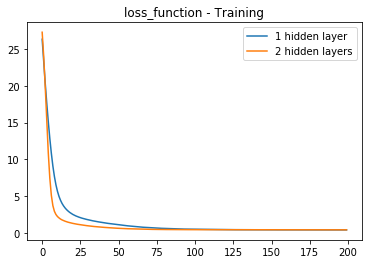

In [24]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

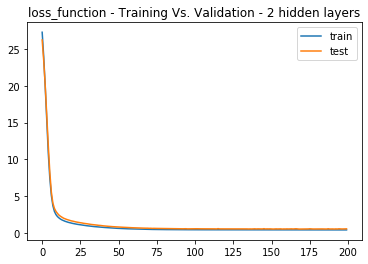

In [25]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()

In [26]:
print(model_2.history["loss"][-1])
print(model_2.history["val_loss"][-1])

0.38475560681216947
0.5289051632086436
